### Measures Of Variability

#### The Range
So far we've focused entirely on summarizing distributions using the mean, the weighted mean, the median, and the mode. An interesting distribution property we haven't yet discussed is variability. Consider, for instance, these two distributions of numerical values:

**A=[4,4,4,4]**

**B=[0,8,0,8]**

The values of the distribution A
don't vary — each value is 4. The values in distribution B show some variability — they are not all identical, and the values can be either 8 or 0. If we were to quantify variability, we could assign a value of 0 to A to indicate that it has no variability. But what variability value should we assign to distribution B?

We need a measure to summarize the variability of these two distributions. The summary metrics we've learned so far don't tell us anything about variability. The mean, the median, and the mode of distribution A are all 4, and distribution B has a mean and a median of 4, and no mode. If we were to judge variability based on these values, we'd probably have to conclude that the variabilities of the two distributions are equal, which is wrong.

One intuitive way to measure the variability of a distribution is to find the difference between the maximum and the minimum value. Both the maximum and the minimum of distribution A is 4, so the variability of distribution A is 0:

**max(A)−min(A)=4−4=0**

We call **this measure of variability the range**. So the range of distribution A is 0. The range of distribution B is 8:

**max(B)−min(B)=8−0=8**

In more general terms, the range of distribution X, where X can be any distribution of real numbers, is:

**range(X)=max(X)−min(X)**

In [1]:
# Measure the range of the SalePrice variable for each year of sales. 
import pandas as pd

houses = pd.read_table('./datasets/AmesHousing_1.txt')
range_by_year = {}

def find_range(array):
    return max(array) - min(array)

for year in houses['Yr Sold'].unique():
    data_by_year = houses[houses['Yr Sold'] == year]
    range_by_year[year] = find_range(data_by_year['SalePrice'])

print(range_by_year, '\n')

print('Prices had the greatest variability in 2008 - False', '\n')
print('Prices variability had a peak in 2007, then the variability started to decrease until 2010 when there was a short increase in variability compared to the previous year (2009) - True')


{2010: 598868, 2009: 575100, 2008: 601900, 2007: 715700, 2006: 590000} 

Prices had the greatest variability in 2008 - False 

Prices variability had a peak in 2007, then the variability started to decrease until 2010 when there was a short increase in variability compared to the previous year (2009) - True


#### The Average Distance

The problem with the range is that it considers only two values in the distribution — the minimum and the maximum value. Consider this distribution C

**C=[1,1,1,1,1,1,1,1,1,21]**

We can see there's not much variability in distribution C- we have nine values of 1, and a single value of 21. **Intuitively, we'd expect the variability of distribution C to be greater than 0 because there is some variability after all, but not much greater than 0 (remember from the last screen that a distribution whose values don't vary should ideally have a variability of 0)**. Despite our expectations, the range indicates that the variability of distribution C is 20.

**max(C)−min(C)=21−1=20**

This is signficantly greater than 0 and doesn't seem like a reasonable measure of variability for distribution C
. The root of the problem is that the range considers only the two extreme values, and this makes it extremely sensitive to outliers. To get a more balanced measure of variability for distribution C, we need to take into account each value in the distribution.

To take into account each value when measuring variability we could:

1. Take a reference value, and measure the distance of each value in the distribution from that reference value.
    * We can take the mean of the distribution as a reference value.
    * Then, we measure the distance between each value in the distribution and the mean.
        
2. Find the mean of the distances.
    * We first need to sum up all the distances.
    * Then we need to divide the total by the number of distances.

![title](./img/variability/1_var.png)
![title](./img/variability/2_var.png)

In [2]:
# Write a function that takes in a numerical array and returns the average distance 
C = [1,1,1,1,1,1,1,1,1,21]

def average_distance(array):
    reference_point = sum(array) / len(array) # Calculate mean of the array
    print('Mean/Ref Point - ',reference_point)
    distances = []
    for value in array:
        distances.append(value - reference_point)

    print('Distances - ',distances)
    return sum(distances) / len(distances)

avg_distance = average_distance(C)    
print('Avg Distance - ',avg_distance)

Mean/Ref Point -  3.0
Distances -  [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, 18.0]
Avg Distance -  0.0


The average distance was 0. This is because the mean is the balance point of the distribution and, as we've learned, the total distance of the values that are above the mean is the same as the total distance of the values below the mean.

The mean μ of the distribution C is 3, so we have:


![title](./img/variability/3_var.png)

#### MEAN Absolute Deviation

![title](./img/variability/4_var.png)
![title](./img/variability/5_var.png)

In [3]:
# Write a function that takes in a numerical array and returns the mean absolute deviation. 
def mean_absolute_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        absolute_distance = abs(value - reference_point)
        distances.append(absolute_distance)
        
    return sum(distances) / len(distances)

mad = mean_absolute_deviation(C)
print('Mean Absolute Deviation - ',mad)

Mean Absolute Deviation -  3.6


#### Variance

![title](./img/variability/6_var.png)
![title](./img/variability/7_var.png)

In [4]:
# Write a function that takes in a numerical array and returns the variance of that array.

def variance(array):
    reference_point = sum(array) / len(array)

    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2 # It's power of 2, i.e square of the resulting difference
        distances.append(squared_distance)

    print(distances)
    return sum(distances) / len(distances)

variance_C = variance(C)
variance_C

[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 324.0]


36.0

In the previous exercise, we got a variance of 36 for distribution C=[1,1,1,1,1,1,1,1,1,21], which was much more than we had expected. **This high variability value is the direct result of the squaring process, which makes most distances much bigger than they actually are.**

#### Standard Deviation

![title](./img/variability/8_var.png)
![title](./img/variability/9_var.png)

In [5]:
# Write a function that takes in a numerical array and returns the standard deviation of that array.
from math import sqrt

C = [1,1,1,1,1,1,1,1,1,21]

def standard_deviation(array):
    reference_point = sum(array) / len(array)

    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)

    variance = sum(distances) / len(distances)

    return sqrt(variance)

standard_deviation_C = standard_deviation(C)
standard_deviation_C

6.0

#### Average Variability Around the Mean

In practice, standard deviation is perhaps the most used measure of variability. Let's try to get a better understanding of it by measuring the variability of the SalePrice variable in our data set. We'll use the standard_deviation() function we wrote for the previous exercise.
Standard deviation tells us how much the values in a distribution vary (on average) around the mean of that distribution. The mean of the SalePrice variable is approximately $180,796.

The mean tells us that the average price of a house is roughly 
$180,796, 

but this doesn't mean that each house (or most of them) costs exactly $180,796. 

One house could cost 
$120,000, 

another 
$240,000,

and it could be that no house actually costs exactly 
$180,796. 

The standard deviation gives us a picture about this variability around the mean sale price. So, on average, sale prices vary by roughly 
$79,873 

above and below a mean of 
$180,796.

In [6]:
print('Std-Deviation - ',standard_deviation(houses['SalePrice']), '\n')
print('Mean - ',houses['SalePrice'].mean())

Std-Deviation -  79873.05865192247 

Mean -  180796.0600682594


Below, we'll try to visualize this variability around the mean by:

* Generating a histogram for the distribution of the SalePrice variable.
* Using vertical lines to mark the mean and the average deviations above and below the mean.


st_dev -  79873.05865192247 mean -  180796.0600682594


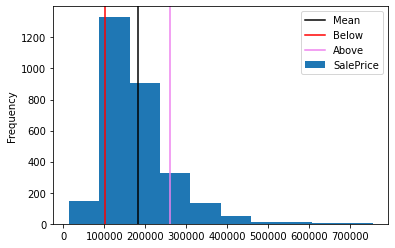

In [7]:
import matplotlib.pyplot as plt

mean = houses['SalePrice'].mean()
st_dev = standard_deviation(houses['SalePrice'])
print('st_dev - ',st_dev, 'mean - ',mean)
houses['SalePrice'].plot.hist()

plt.axvline(mean, color='Black', label='Mean')
plt.axvline(mean - st_dev, color = 'Red', label = 'Below')
plt.axvline(mean + st_dev, color = 'Violet', label = 'Above')
plt.legend()

Notice in the histogram that prices can vary around the mean much more or much less than $79,873. 

Some outliers around $700,000 

are more than 
$500,000 

above the mean and a couple of houses around 

$30,000 

are more than 
$150,000 

below the mean. 

The standard deviation doesn't set boundaries for the values in a distribution: the prices can go above and below the mean more than $79,873.

In [8]:
# The standard deviation of the SalePrice variable should give us a picture about the diversity of prices on the real estate market
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

# Measure first the variability for each year
years = {}

for year in houses['Yr Sold'].unique():
    year_segment = houses[houses['Yr Sold']==year]
    st_dev = standard_deviation(year_segment['SalePrice'])
    years[year] = st_dev


# Get years of max and min variability
greatest_variability = max(years, key = years.get) # outputs directly the year with the maximum variability

lowest_variability = min(years, key = years.get) # outputs directly the year with the minimum variability

print(greatest_variability, lowest_variability)

2006 2010


#### A Measure of Spread

Another way to understand standard deviation is as a measure of spread in a distribution — values in a distribution can be more or less spread. We took four random samples of 50 sample points each from the SalePrice distribution, and plotted their histograms to visualize the spread for each sample.

![title](./img/variability/10_var.png)

According to our visual estimates, sample 2 has the biggest spread, while the other three samples have a similar spread, with sample 3 seemingly having the lowest spread. The standard deviations of these four distributions fit our visual estimates fairly well.

In [9]:
for i in range(1, 5):
    sample = houses['SalePrice'].sample(50, random_state = i)

    # we used the same random states for the samples in the graph above
    st_dev = standard_deviation(sample)
    print('Sample ' + str(i) + ': ' + str(st_dev))

Sample 1: 81785.0811515768
Sample 2: 100370.62998094413
Sample 3: 60676.038515710636
Sample 4: 64436.40016450328


We took two samples of 50 sample points each from the distribution of the Year Built variable. Examine the graph below, and estimate visually which sample has a bigger spread.

![title](./img/variability/11_var.png)

In [10]:
sample1 = houses['Year Built'].sample(50, random_state = 1)
sample2 = houses['Year Built'].sample(50, random_state = 2)

def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)
bigger_spread = 'sample 2'
st_dev1 = standard_deviation(sample1)
st_dev2 = standard_deviation(sample2)

print(st_dev1, st_dev2)

29.239589600403075 32.466234767832255


#### The Sample Standard Deviation

![title](./img/variability/12_var.png)

![title](./img/variability/13_var.png)